## Analysing stock market prices over time 

### Apple Stock
R code and methodology to analyse apple stock price data over 2017-2019 to see the impact of corporate events and products launches on stock prices. This analysis aims to understand the impact apple product launch on apple stock and how do apple stock prices fluctuate, post the launch of a new product.


### Introduction
Stock prices can be influenced by alot of factors and product launches can have a huge impact of the stock price. Apple has product launch events before it launches its new products  therefore I wanted to analyse the impact of these launch events on apple stock prices. Additionly, It would be interesting to analyse any possible anomalies in the stock during the launch of apple products. I picked the year 2017- 2019 as Iphone 10 was launched in 2017 and there was alot of curiosity and anticipation before the launch of Iphone 10 as most users anticipated the launch to be big and innovative. It will be interesting to see the movement of the stock price and volume between and during the two launch periods.



## Install R libraries required for the analysis

In [4]:
library(quantmod)
library(TTR)
# The easiest way to get dplyr is to install the whole tidyverse:
library(tidyverse) # https://www.tidyverse.org/
library(dplyr) # or just dplyr

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()



## Exploratory Data Analysis


In [5]:
getSymbols(c("AMZN","LMT","AAPL","FB","GOOGL","SQ","SNAP"))


‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols



[1] "AMZN"  "LMT"   "AAPL"  "FB"    "GOOGL" "SQ"    "SNAP"

In [6]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.577937
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.635158
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.616391
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.629312
2007-01-09  3.087500  3.320714 3.041071   3.306071  3349298400      2.847729
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.984010

In [7]:
df <- AAPL


In [8]:
summary(df) ##Checking the summary of the stock data to get an insight into the data 

     Index              AAPL.Open         AAPL.High          AAPL.Low      
 Min.   :2007-01-03   Min.   :  2.835   Min.   :  2.929   Min.   :  2.793  
 1st Qu.:2010-07-14   1st Qu.:  9.236   1st Qu.:  9.300   1st Qu.:  9.120  
 Median :2014-01-23   Median : 21.664   Median : 21.841   Median : 21.503  
 Mean   :2014-01-22   Mean   : 28.457   Mean   : 28.759   Mean   : 28.150  
 3rd Qu.:2017-08-02   3rd Qu.: 38.426   3rd Qu.: 38.602   3rd Qu.: 38.072  
 Max.   :2021-02-12   Max.   :143.600   Max.   :145.090   Max.   :141.370  
   AAPL.Close       AAPL.Volume        AAPL.Adjusted    
 Min.   :  2.793   Min.   :4.545e+07   Min.   :  2.406  
 1st Qu.:  9.238   1st Qu.:1.354e+08   1st Qu.:  7.958  
 Median : 21.676   Median :2.852e+08   Median : 18.914  
 Mean   : 28.466   Mean   :4.144e+08   Mean   : 26.989  
 3rd Qu.: 38.361   3rd Qu.:5.653e+08   3rd Qu.: 36.712  
 Max.   :143.160   Max.   :3.373e+09   Max.   :142.946  

### 1. Apple price change over time

As we can see there is an general upward trend in the price of the stock over the years. We see a sharp drop in the price of the stock in Jan 2019. 




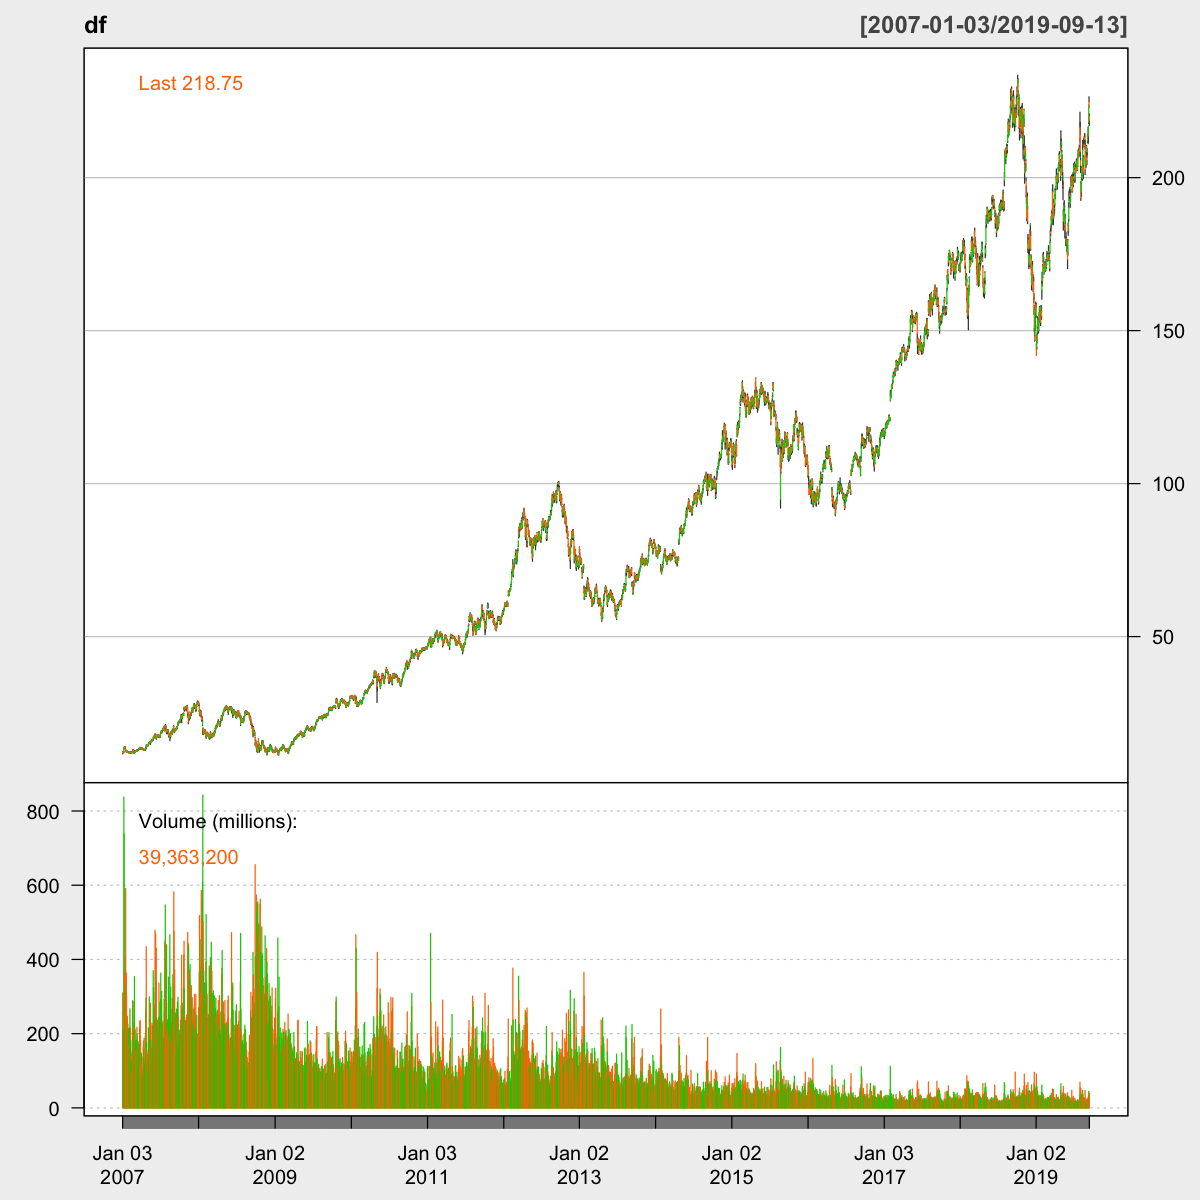

In [173]:
chartSeries(df, theme = chartTheme("white"))

### 2. Apple stock  5 months prior


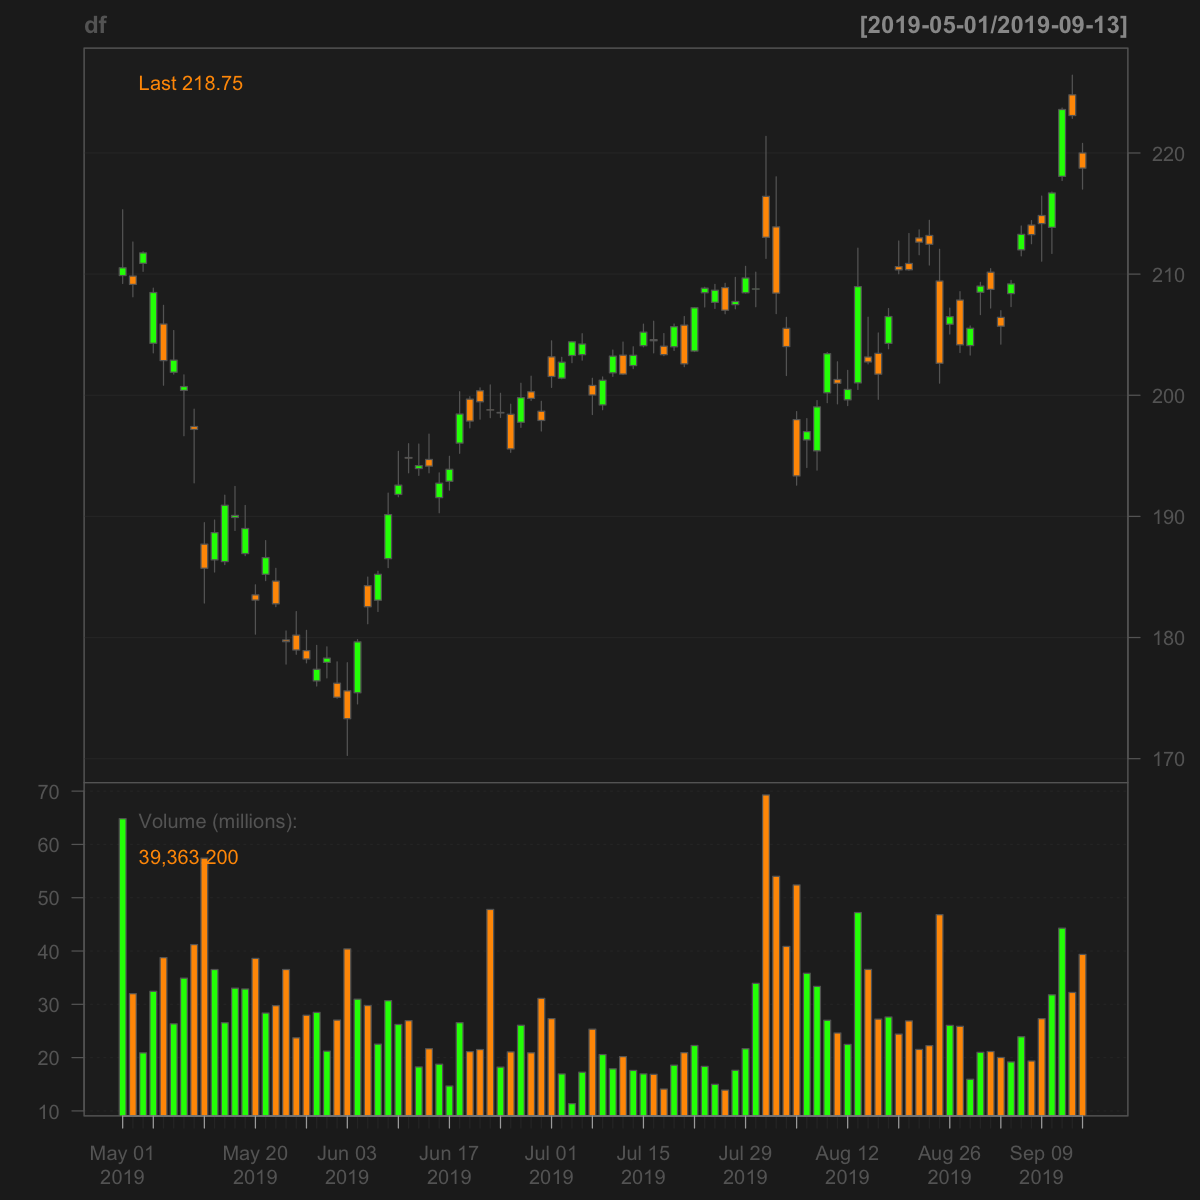

In [175]:
chartSeries(df, subset = "last 5 months")

## 3. Apple stock price for the last two years (2017-2019)
If we analyse the stock price of apple for the last two years,we can see a general upward trend in the stock price, however in january 2019 we see a sudden and steep dip in the stock price and an increase in the volume. This drop in the price is worth investigating. 


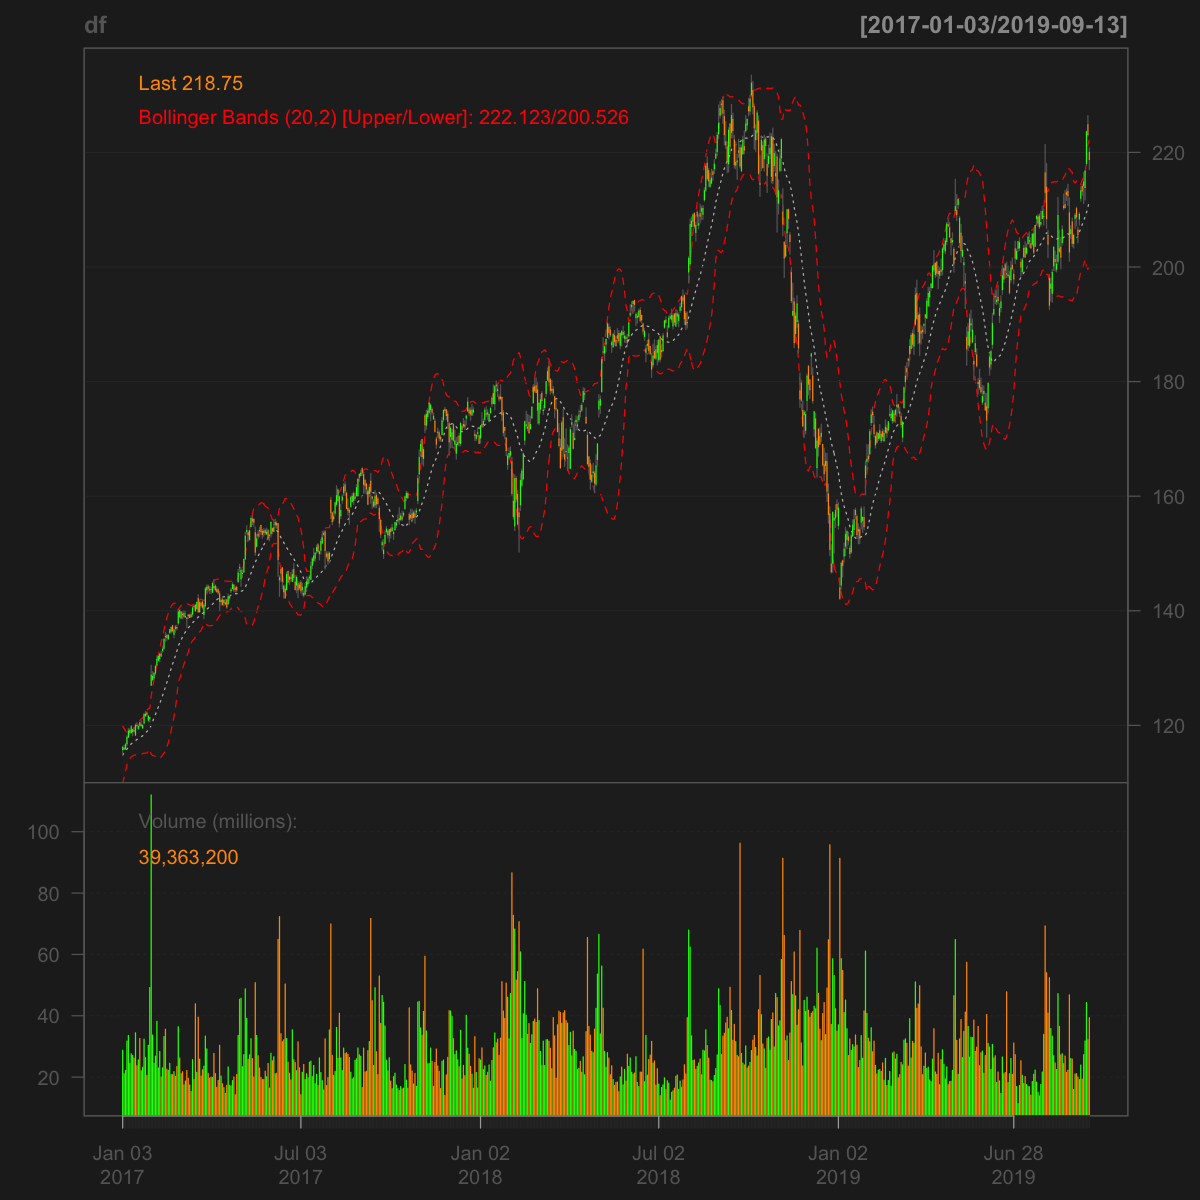

In [88]:
chartSeries(df, subset = "2017::2019", TA = c(addVo(), addBBands()))


## 4. Apple Stock price two months before and after the launch of iphone 10
On analysing the price of apple stocks two months before the launch of iphone 10, we notice that the volume is really high on the day of the launch. Additionally, we notice that the stock price decreases post the launch of the product which might be because the product did not meet customer expectation.

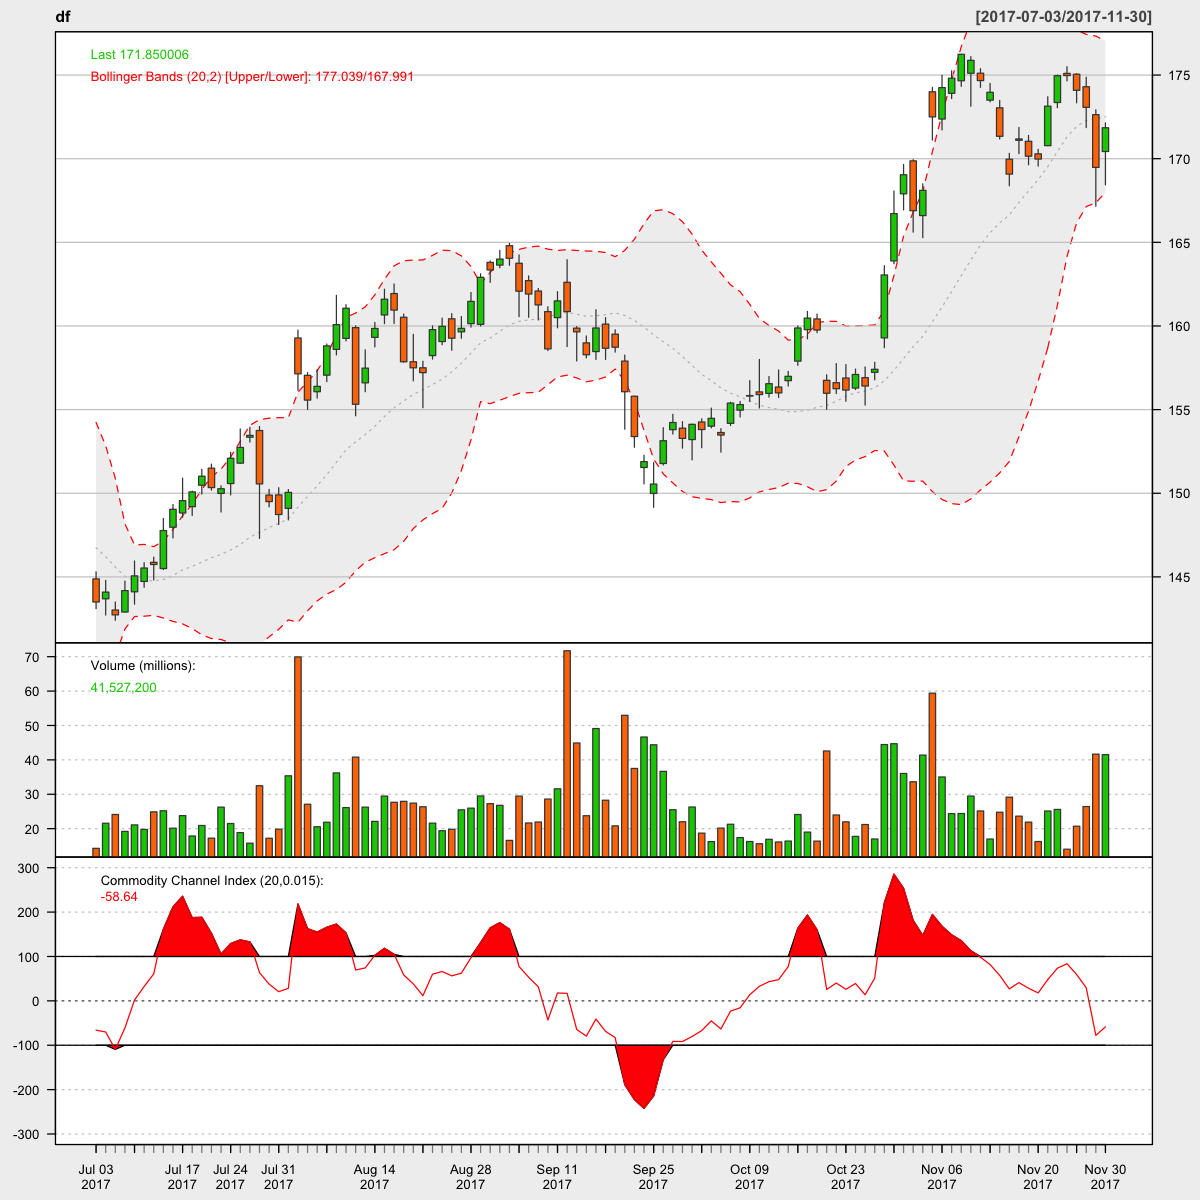

In [89]:
chartSeries(df, subset = "2017-07::2017-11",theme="white",  TA="addVo();addBBands();addCCI()")

## 5. Apple stock two months before the launch of iphone 11 
On analysing the graph below we see a drop in the price of the stock price in august and the stock price of apple increased after the launch event of apple 11. 

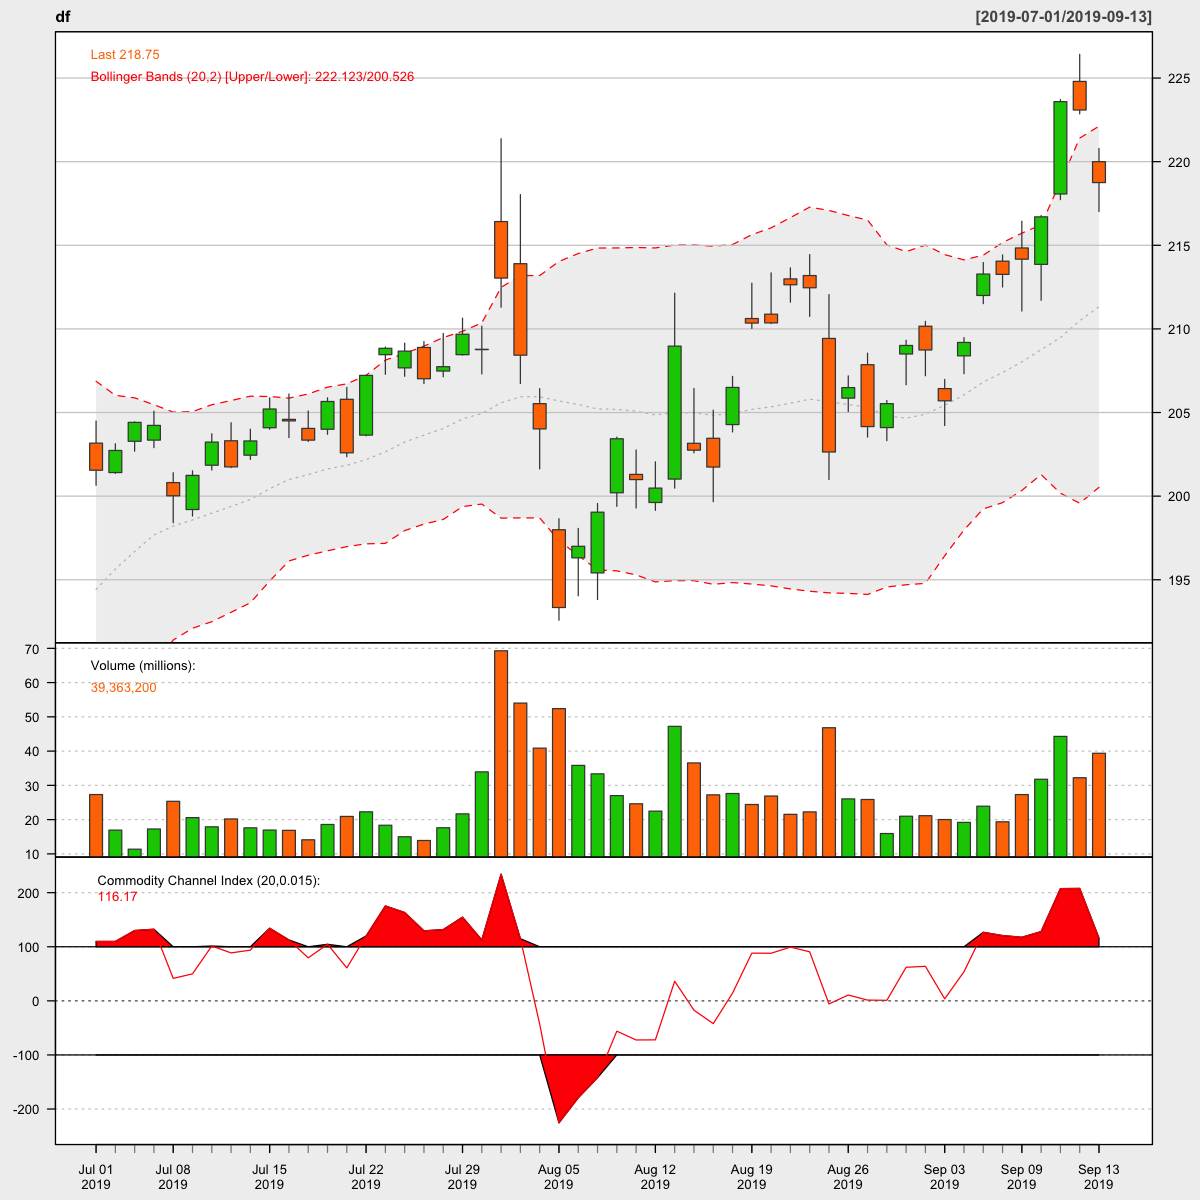

In [90]:
chartSeries(df, subset = "2019-07::2019-09",theme="white",  TA="addVo();addBBands();addCCI()")

## Apple stock price over the last two years - 2017- 2019

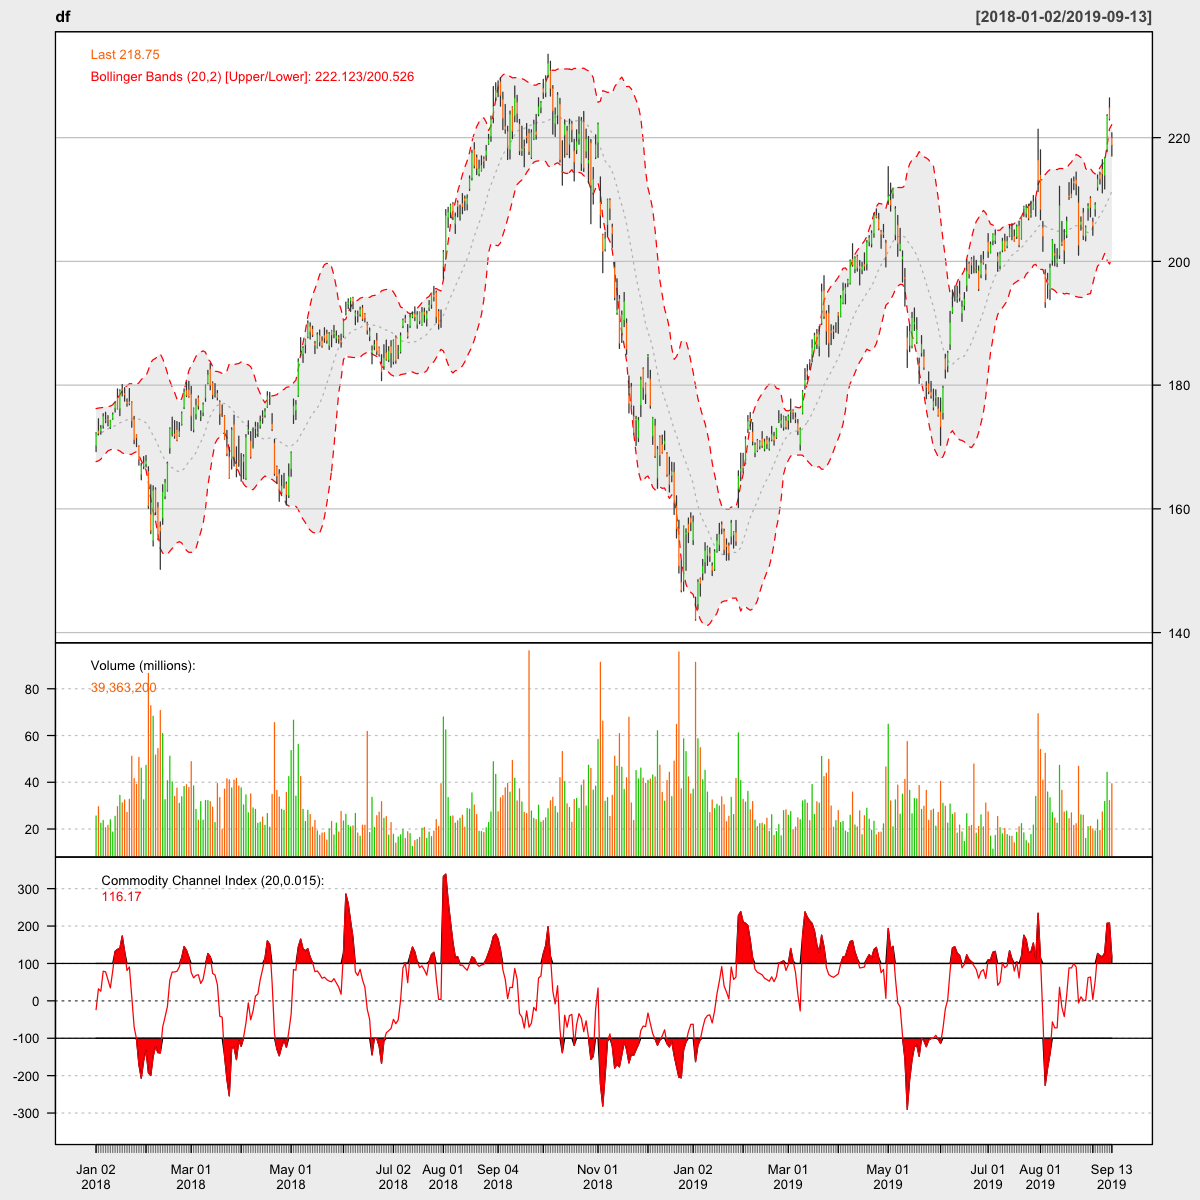

In [119]:
chartSeries(df, subset = "2018::2019-09",theme="white",  TA="addVo();addBBands();addCCI()")

## Conclusion
On analysing the graphs above, we can see that the stock price dropped immeditely after the launch of Iphone X for a short period of time but increased eventually. Overall, we notice that the stock price of apple has been increaing over the years and the price generally tends to fluctuate during the launch of new products. The price fluctuation is based on customer perception of the new product, therefore it might be difficult to use this as a predictor of future price. We see an unusual dip in the price of the stock in January 2019, we will evaluate the drop in the next section.

##  Lead 2

In the above graphs we noticed that while the general trend of the stock price is increasing, the stock price see a drastic drop in January 2019. Analysing the volume and stock price for 2019 to see any anomaly.

## 2.1 Boxplot displaying volume in 2019

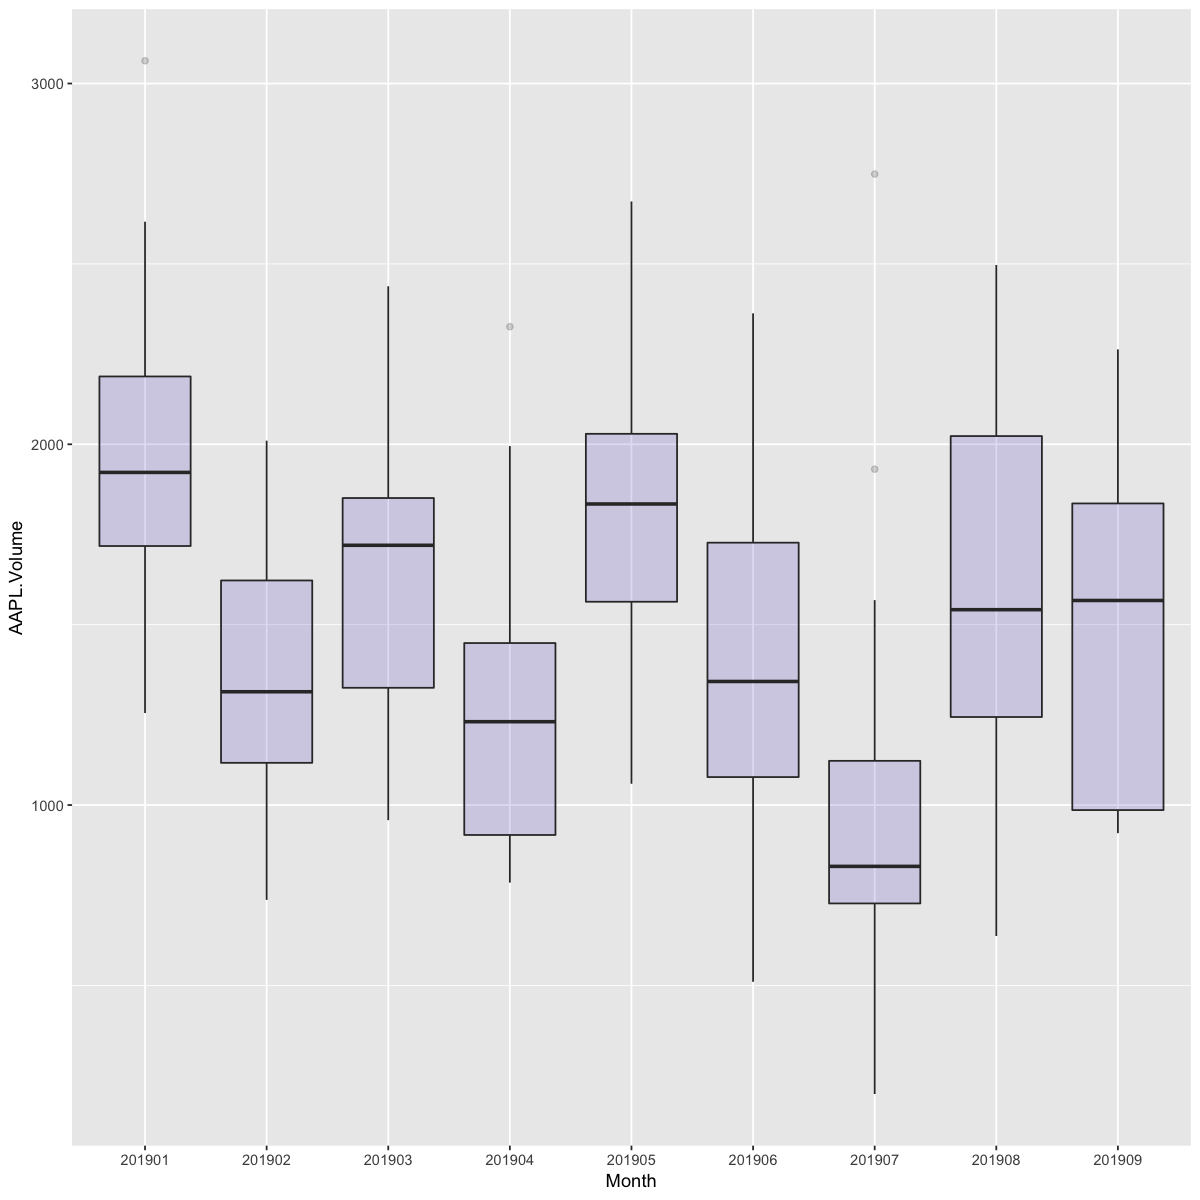

In [180]:
# A really basic boxplot.
df3 <- df2 %>% filter(year==2019)
df3$AAPL.Volume <- as.numeric(df3$AAPL.Volume)

# Basic plot
p <-ggplot(df3, aes(x=as.factor(month), y=AAPL.Volume)) 

p + geom_boxplot(fill="slateblue", alpha=0.2) +  xlab("Month")

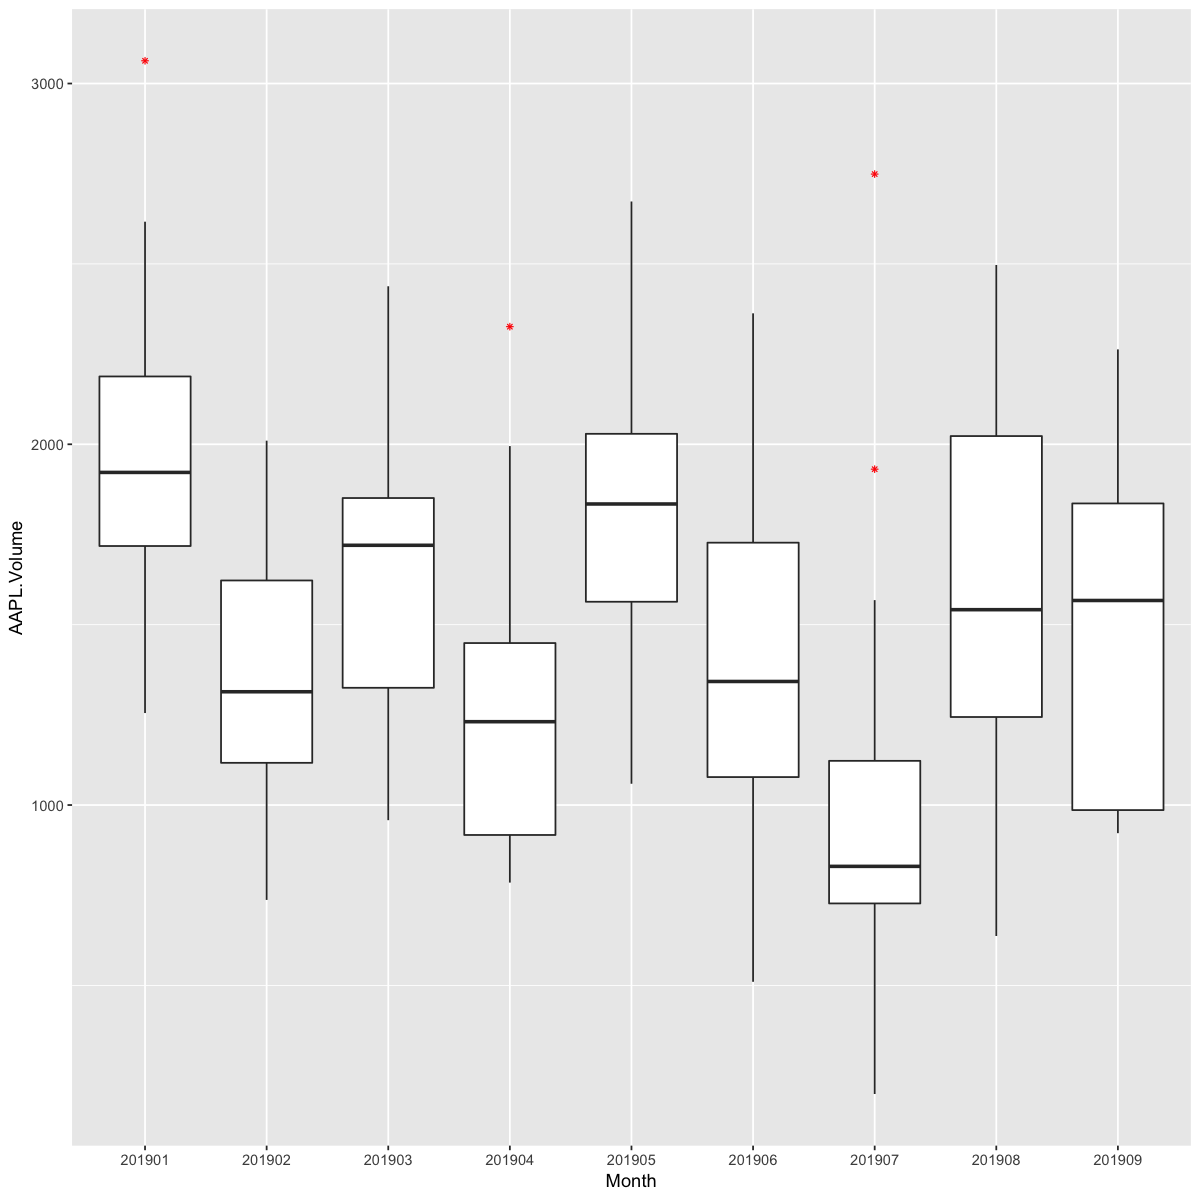

In [181]:
# Change outlier, color, shape and size
p2 <- p  + geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) +     xlab("Month")
p2

## Box plot displaying closing stock values for 2019

Warning message in bxp(list(stats = structure(c(147.929993, 152.289993, 153.800003, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


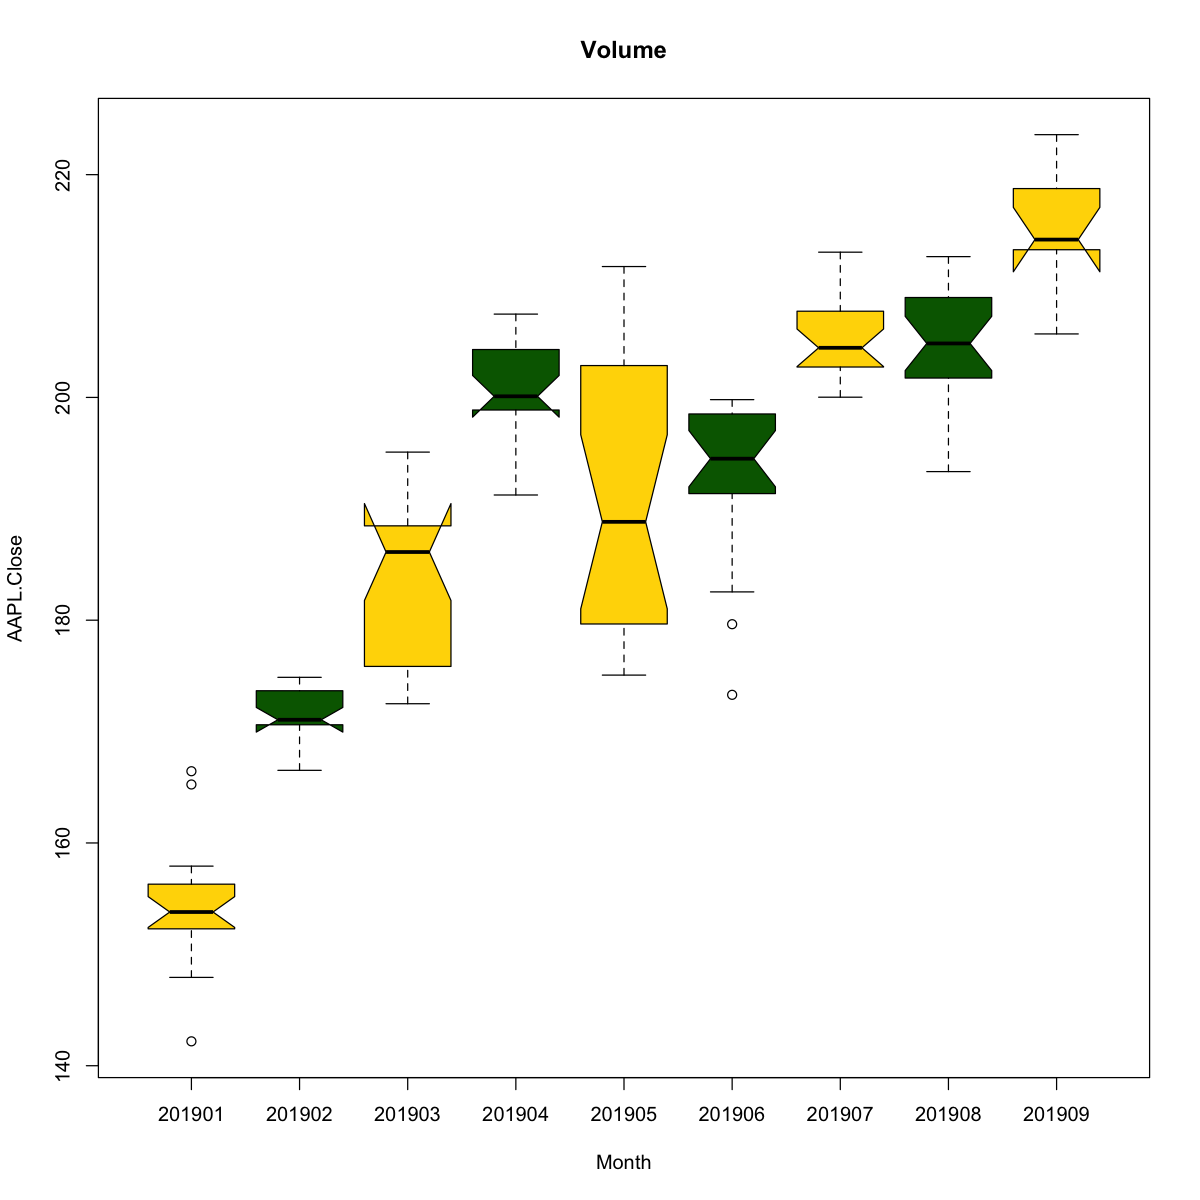

In [140]:
boxplot(AAPL.Close~month, data=df3, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Volume", xlab="Month")

In the above figures we analyse the volume and price of the Apple stock in jan 2019. The increase in volume in trading could be a result of the low stock price. Though we see some outliers in the price and volume additional research will be required to understand the unusual drop in Price. 

## Monthly Stock Statistics

In [9]:
df2 <- df

In [10]:
class(df)

[1] "xts" "zoo"

In [11]:
df.monthly <- to.monthly(df,subset = "2017::2019-09")


In [12]:
df.monthly

            df.Open    df.High     df.Low   df.Close   df.Volume df.Adjusted
Jan 2007   3.081786   3.492857   2.925000   3.061786 27209781200    2.637310
Feb 2007   3.079643   3.243214   2.959286   3.021786 13722354800    2.602855
Mar 2007   3.001071   3.458214   2.991071   3.318214 15918644000    2.858188
Apr 2007   3.362143   3.660714   3.200000   3.564286 13459740000    3.070146
May 2007   3.556786   4.363214   3.519643   4.328214 17365068000    3.728165
Jun 2007   4.325000   4.557500   4.121429   4.358571 23279541600    3.754313
Jul 2007   4.323214   5.318571   4.260714   4.705714 24018573600    4.053330
Aug 2007   4.772857   4.987500   3.986429   4.945714 24360798000    4.260058
Sep 2007   4.997857   5.535714   4.642857   5.481071 20931223600    4.721195
Oct 2007   5.522500   6.790000   5.461786   6.783929 23277791600    5.843428
Nov 2007   6.735714   6.881429   5.379643   6.507857 26199790400    5.605631
Dec 2007   6.495000   7.248571   6.321071   7.074286 17252678800    6.093531

## Conclusion

As we can see above that overtime the stock price of apple has been increasing with minor fluctuations around the launch of new products. The stock price of apple is influenced by the perception of people of the product. If customers like the product the price is likely to go up and if the product does not meet customer expectation then the price is likely to decrease. Since, the product information is availble to the people the price fluctuations can be expected and considered normal.  

Addiitonal research on the unusual drop of the APPl stock price in jan 2019 suggests that the stock price of APPL stock dropped in Jan 2019 because President Donald Trump declared he would increase tariffs on 200B chinese goods to 25% and Apple's revenue from China also continues to face risk from Iphone sales. While, External factors such as revenue and political conditions are unpredictable and can affect stock prices, following the news could be an indicator of stock prices. 